In [121]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [144]:
def plot_loss(log_path, ylim=None, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    print("chance rate : ", math.log(1/32000))
    print("initial validation loss : ", log_valid[0])
    #print(log_valid)
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    min_tra = min(log_train)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    [print("Minimize training loss({}) : {} Epoch ".format(min_tra, i+1)) 
           for i, l in enumerate(log_train) if l == min_tra ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    plt.show

# ☆　Only twitter

In [136]:
log_path_twitter = "../../emotion_dialogue_model/log/train20190213233451.log" 
log_path_tw21_all = "../../emotion_dialogue_model/log/train20190220212122.log"
log_path_tw21_clean = "../../emotion_dialogue_model/log/train20190220221529.log"
log_path_tw21_all41_clean = "../../emotion_dialogue_model/log/train20190220224919.log" 

Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_twitter

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

hidden_size: 256

SOS_id: 1

l2_pooling: False

lr_decay: 0.5773502691896258

max_epoch: 100

decoder_learning_ratio: 1.0

batch_size: 64

EOS_id: 2

tfd_lambda: 0.4

learning_rate: 0.0003

inf_last: False

MAX_UTTR_LEN: 50

dropout: 0.1

decay_step: 120000

UNK_id: 3

num_layers: 2

chance rate :  -10.373491181781864
initial validation loss :  10.3654
Minimize validation loss(5.3976) : 21 Epoch 
Minimize training loss(4.9307) : 86 Epoch 


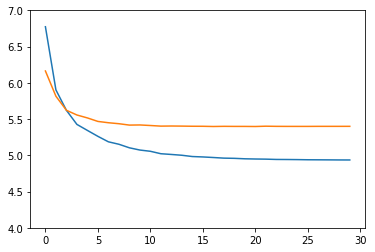

In [137]:
plot_loss(log_path_twitter, ylim=[4,7],MAX=30)

In [42]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_twitter_21.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: おけけけけけけけけけけ
tgt: 何時から働くってのゎ内緒にしとくわwww
1[-3.61]: だまれ 
2[-4.72]: うぇーい 
3[-5.25]: うざい 
4[-5.46]: なんや 
5[-5.69]: だまれはげ 

Dial 2:
src: いえいえ はいたくさん絡みましょ
tgt: 早速ですが、なんて呼んだらいいですか
1[-2.06]: もちろんです 
2[-2.67]: なんて呼んだらいいですか 
3[-3.02]: こちらこそです 
4[-3.04]: はい なんて呼んだらいいですか 
5[-3.18]: もちろんです なんて呼んだらいいですか 

Dial 3:
src: もずちゃんちゃん、そんなことより楽しいことしようよ
tgt: 何言ってんの
1[-0.89]: 今忙しいからこいつとしゃべっててKAMEIloveSEX 
2[-3.16]: 今忙しいからこいつとしゃべっててKAMEIloveπ 
3[-3.39]: 何か用 
4[-3.85]: ん 
5[-3.97]: あ 

Dial 4:
src: 頑張りました〜
tgt: イェーイo\
1[-3.65]: ありがとう 
2[-3.74]: お疲れ様 
3[-3.78]: ありがと 
4[-4.65]: おつ 
5[-5.30]: お疲れ様でーす 

Dial 5:
src: こちらも 阿部さんいますね ́v
tgt: こっちは構えてますねw
1[-3.67]: ありがとうございます 
2[-4.59]: はい 
3[-4.91]: ありがとです 
4[-4.92]: ありがとうございます ́艸` 
5[-5.09]: ありがとうございます ́∀` 

Dial 6:
src: だれとくんの
tgt: れんたとりゅうたろ
1[-3.60]: だれ 
2[-4.19]: ちがう 
3[-5.45]: おまえ 
4[-6.02]: ちがうちがう 
5[-6.16]: お前 

Dial 7:
src: おっけ^ω^ 1日目
tgt: 福岡両日おるからどっちでも大丈夫です゚▽゚

# ☆　twitter dataset -> cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0220_tw21_clean

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

SOS_id: 1

inf_last: False

hidden_size: 256

MAX_UTTR_LEN: 50

num_layers: 2

PAD_id: 0

UNK_id: 3

max_epoch: 300

tfd_lambda: 0.4

decoder_learning_ratio: 1.0

lr_decay: 0.5773502691896258

l2_pooling: False

batch_size: 64

teacher_forcing_ratio: 1.0

dropout: 0.1

learning_rate: 3e-05

Minimize validation loss(6.6546) : 57 Epoch 
Minimize validation loss(6.6546) : 58 Epoch 
Minimize validation loss(6.6546) : 59 Epoch 
Minimize validation loss(6.6546) : 60 Epoch 
Minimize validation loss(6.6546) : 61 Epoch 
Minimize validation loss(6.6546) : 62 Epoch 
Minimize validation loss(6.6546) : 63 Epoch 
Minimize validation loss(6.6546) : 64 Epoch 
Minimize validation loss(6.6546) : 65 Epoch 
Minimize validation loss(6.6546) : 66 Epoch 
Mini

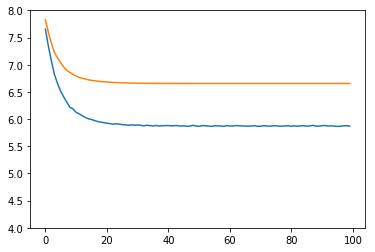

In [74]:
plot_loss(log_path_tw21_clean,ylim=[4,8], MAX=100)

In [117]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0220_tw21_clean_57.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: えーめんどくさい。
tgt: お部屋汚いよね。
tgt_emotion: neutral
inf:  NONE
1[-3.87]: 掃除してください!? 

inf:  neutral
1[-3.84]: 掃除してください!? 

inf:  anger
1[-3.75]: 掃除してください!? 

inf:  sad
1[-3.67]: 掃除してください!? 

inf:  happy
1[-3.85]: 掃除してください!? 

inf:  contentment
1[-3.84]: 掃除してください!? 

Dial 2:
src: うるさいな。それなら君が片付ければいいだろう。満足いくようにしたら良いじゃないか。
tgt: 私は生活指導のためのロボットです。生活の世話をするためのロボットではありません。
tgt_emotion: anger
inf:  NONE
1[-4.74]: そうですね 

inf:  neutral
1[-4.73]: そうですね 

inf:  anger
1[-4.76]: そうですね 

inf:  sad
1[-4.72]: そうですね 

inf:  happy
1[-4.72]: そうですね 

inf:  contentment
1[-4.68]: そうですね 

Dial 3:
src: 一部分だけじゃ納得できないし。
tgt: 全部やっても、ジュースは凍ってシャーベットになっておいしいかも!
tgt_emotion: NONE
inf:  NONE
1[-4.57]: 掃除をしたんですか!? 

inf:  neutral
1[-6.12]: それはありますね。 

inf:  anger
1[-6.08]: それはありますね。 

inf:  sad
1[-4.57]: 掃除をしたんですか!? 

inf:  happy
1[-6.17]: それはありますね。 

inf:  contentment
1[-6.14]: それはありますね。 

Dial 4:
src: うーん
tgt: Aさんの成績が上がっ

In [120]:
import math
math.log(1/32000)

-10.373491181781864

# ☆　twitter dataset -> all domain

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0220_tw17_all

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

inf_last: False

UNK_id: 3

decay_step: 360

decoder_learning_ratio: 1.0

batch_size: 64

l2_pooling: False

lr_decay: 0.5773502691896258

EOS_id: 2

max_epoch: 400

hidden_size: 256

teacher_forcing_ratio: 1.0

max_gradient: 50.0

learning_rate: 3e-05

tfd_lambda: 0.4

SOS_id: 1

PAD_id: 0

Minimize validation loss(5.8048) : 41 Epoch 
Minimize validation loss(5.8048) : 42 Epoch 
Minimize validation loss(5.8048) : 43 Epoch 
Minimize validation loss(5.8048) : 44 Epoch 
Minimize validation loss(5.8048) : 45 Epoch 
Minimize validation loss(5.8048) : 46 Epoch 
Minimize validation loss(5.8048) : 47 Epoch 
Minimize validation loss(5.8048) : 48 Epoch 
Minimize validation loss(5.8048) : 49 Epoch 
Minimize validation loss(5.8048) : 50 Epoch 
Minimize v

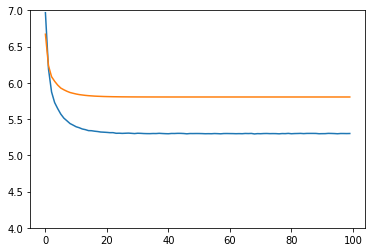

In [69]:
plot_loss(log_path_tw21_all,ylim=[4,7], MAX=100)

In [118]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0220_tw17_all_41.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 自分のことだからロボットには関係ない。
tgt: 手伝うから掃除してよ。
tgt_emotion: sad
inf:  NONE
1[-3.07]: Aさんのために頑張りなさい。 

inf:  neutral
1[-3.07]: Aさんのために頑張りなさい。 

inf:  anger
1[-3.16]: Aさんのために頑張りましょう! 

inf:  sad
1[-3.09]: Aさんのために頑張りなさい。 

inf:  happy
1[-3.13]: Aさんのために頑張りなさい。 

inf:  contentment
1[-3.09]: Aさんのために頑張りなさい。 

Dial 2:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
inf:  NONE
1[-3.33]: Aさんのために運動不足です。 

inf:  neutral
1[-3.54]: Aさんのために運動しないといけません。 

inf:  anger
1[-3.58]: Aさんのために運動しないといけません! 

inf:  sad
1[-3.29]: Aさんのために運動不足です。 

inf:  happy
1[-3.35]: Aさんのために運動不足です。 

inf:  contentment
1[-3.32]: Aさんのために運動不足です。 

Dial 3:
src: うん...けどどうせ散らかるし面倒だもんな。
tgt: つべこべ言わずに片付けなさい。物を大切にしない子はお母さんが怒りますよ。
tgt_emotion: anger
inf:  NONE
1[-2.77]: Aさんのために運動しないといけませんよ! 

inf:  neutral
1[-2.77]: Aさんのために運動しないといけませんよ! 

inf:  anger
1[-1.07]: Aさんは健康第一生活習慣を解消するために運動しないといけませんよ! 

inf:  sad
1[-2.77]: Aさんのために運動しないとい

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8fbc10eeb8>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　twitter dataset -> all domain -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0220_tw17_all41_clean

Use emotion: True

Checkpoint path: ./model/0220_tw17_all_41.mdl

Pretrained: True

Fix embedding: False

inf_last: False

num_layers: 2

decoder_learning_ratio: 1.0

SOS_id: 1

max_gradient: 50.0

learning_rate: 3e-05

tfd_lambda: 0.4

decay_step: 100

max_epoch: 400

EOS_id: 2

hidden_size: 256

lr_decay: 0.5773502691896258

UNK_id: 3

dropout: 0.1

PAD_id: 0

teacher_forcing_ratio: 1.0

Minimize validation loss(6.1308) : 45 Epoch 
Minimize validation loss(6.1308) : 46 Epoch 
Minimize validation loss(6.1308) : 47 Epoch 
Minimize validation loss(6.1308) : 48 Epoch 
Minimize validation loss(6.1308) : 49 Epoch 
Minimize validation loss(6.1308) : 50 Epoch 
Minimize validation loss(6.1308) : 51 Epoch 
Minimize validation loss(6.1308) : 52 Epoch 
Minimize validation loss(6.1308) : 53 Epoch 
Minimize validation loss(6.1308) : 54 Epoch 
Mi

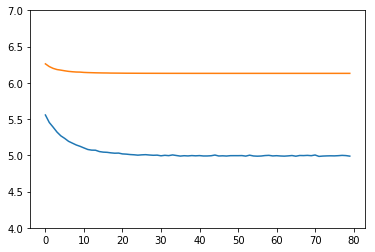

In [85]:
plot_loss(log_path_tw21_all41_clean,ylim=[4,7], MAX=80)

In [86]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0220_tw17_all41_clean_45.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 194 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: でもさー
tgt: 私だって約束を破られれば、泣きたくも怒りたくもなりますよ
tgt_emotion: anger
inf:  NONE
1[-2.92]: Aさんのために掃除しようよ! 

inf:  neutral
1[-2.99]: Aさんのために掃除しようよ! 

inf:  anger
1[-2.95]: Aさんのために掃除しようよ! 

inf:  sad
1[-2.92]: Aさんのために掃除しようよ! 

inf:  happy
1[-3.05]: Aさんのために掃除しようよ! 

inf:  contentment
1[-3.12]: Aさんのために掃除しようよ! 

Dial 2:
src: 掃除も病院も回避する方法はないかな
tgt: 無理です
tgt_emotion: NONE
inf:  NONE
1[-3.55]: まずは掃除しようよ! 

inf:  neutral
1[-3.65]: まずは掃除しようよ! 

inf:  anger
1[-3.41]: まずは掃除しようよ! 

inf:  sad
1[-3.56]: まずは掃除しようよ! 

inf:  happy
1[-1.71]: まずは掃除しようよ!。掃除しないと病気にならないよ? 

inf:  contentment
1[-2.86]: Aさんが掃除をしておけば平気だよ! 

Dial 3:
src: それくらいわかってるよ!なんでそんなに掃除にこだわるんだ?
tgt: 貴方が快適に生活を送るためです。
tgt_emotion: NONE
inf:  NONE
1[-3.15]: そんなこと言わずに掃除しようよ! 

inf:  neutral
1[-3.20]: そんなこと言わずに掃除しようよ! 

inf:  anger
1[-3.15]: そんなこと言わずに掃除しようよ! 

inf:  sad
1[-3.17]: そんなこと言わずに掃除しようよ! 

inf:  happy
1[-3.12]: そんなこと言わずに掃除しようよ! 

inf:  contentm

# ☆ Only cleaning domain

In [116]:
log_path_cleaning = "../../emotion_dialogue_model/log/train20190215123243.log"

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0215_clean

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

inf_last: False

EOS_id: 2

decoder_learning_ratio: 1.0

num_layers: 2

batch_size: 16

learning_rate: 1e-05

lr_decay: 0.5773502691896258

max_epoch: 200

tfd_lambda: 0.4

dropout: 0.1

decay_step: 600000

l2_pooling: False

teacher_forcing_ratio: 1.0

max_gradient: 50.0

MAX_UTTR_LEN: 50

PAD_id: 0

Minimize validation loss(7.9678) : 19 Epoch 


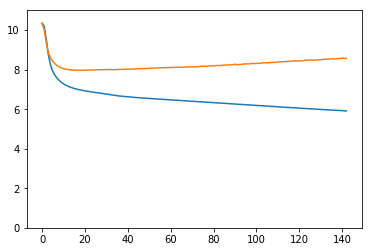

In [51]:
plot_loss(log_path_cleaning,ylim=[0,11], MAX=150)

In [130]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0215_clean_19.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/op_sub_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: わかったよ。やるよ。
tgt: ほんと ⁇ ありがとう ⁇ 
tgt_emotion: happy
inf:  NONE
1[5.64]:  

inf:  neutral
1[5.64]:  

inf:  anger
1[5.64]:  

inf:  sad
1[5.64]:  

inf:  happy
1[5.64]:  

inf:  contentment
1[5.64]:  

Dial 2:
src: 確かに、どこに何があるかわからないね。
tgt: まずは床に散らばっているゴミを捨てるところから始めませんか ⁇ 
tgt_emotion: neutral
inf:  NONE
1[5.65]:  

inf:  neutral
1[5.65]:  

inf:  anger
1[5.65]:  

inf:  sad
1[5.65]:  

inf:  happy
1[5.65]:  

inf:  contentment
1[5.65]:  

Dial 3:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
inf:  NONE
1[5.63]:  

inf:  neutral
1[5.63]:  

inf:  anger
1[5.63]:  

inf:  sad
1[5.63]:  

inf:  happy
1[5.63]:  

inf:  contentment
1[5.63]:  

Dial 4:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[5.64]:  

inf:  neutral
1[5.64]:  

inf:  anger
1[5.64]:  

inf:  sad
1[5.64]:  

inf:  happy
1[5.64]:  

inf:  contentment
1[5.64]:  

Dial 5:
src: さっき掃

# ☆ Only all domain

In [151]:
log_path_all = "../../emotion_dialogue_model/log/train20190222002310.log"

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0221_all

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

max_epoch: 1000

UNK_id: 3

teacher_forcing_ratio: 1.0

max_gradient: 50.0

l2_pooling: False

EOS_id: 2

lr_decay: 0.5773502691896258

decoder_learning_ratio: 1.0

learning_rate: 3e-05

decay_step: 100

tfd_lambda: 0.4

hidden_size: 256

dropout: 0.1

PAD_id: 0

inf_last: False

num_layers: 2

chance rate :  -10.373491181781864
initial validation loss :  10.3742
Minimize validation loss(8.4395) : 12 Epoch 
Minimize training loss(8.0418) : 12 Epoch 


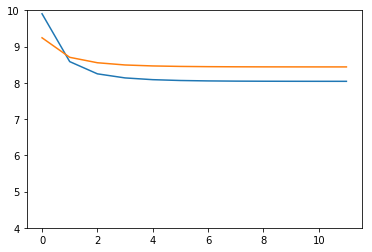

In [154]:
plot_loss(log_path_all, ylim=[4,10], MAX=30)

In [156]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0221_all_14.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだそんなに散らかっていないよ。
tgt: 足の踏み場もないくらいだけど。
1[6.47]:  
2[-6.59]: ! 
3[-7.98]: A 
4[-8.15]: ? 
5[-8.21]: A 

Dial 2:
src: 好きだよ。
tgt: ゲームする時寝っ転がるよね?
1[6.44]:  
2[-6.60]: ! 
3[-7.99]: A 
4[-8.17]: ? 
5[-8.22]: A 

Dial 3:
src: 今から部屋の掃除を始めるよ。
tgt: 話を聞いてくれてとても嬉しい。
1[6.47]:  
2[-6.59]: ! 
3[-7.97]: A 
4[-8.15]: ? 
5[-8.20]: A 

Dial 4:
src: ...
tgt: これではカビが充満しそうです。窓を開けて換気してください。掃除機をかけてホコリを取ってください。
1[6.37]:  
2[-6.68]: ! 
3[-8.07]: A 
4[-8.24]: ? 
5[-8.29]: A 

Dial 5:
src: 怒っているじゃないか。
tgt: 怒っていませんよ。自分の存在の無意味さにふがいなさを感じていただけです。
1[6.45]:  
2[-6.59]: ! 
3[-7.98]: A 
4[-8.16]: ? 
5[-8.21]: A 

Dial 6:
src: うるさいなー、まだ大丈夫だよ
tgt: 部屋が綺麗になるとさっぱりして、勉強も捗るよ
1[6.37]:  
2[-6.68]: ! 
3[-8.07]: A 
4[-8.24]: ? 
5[-8.29]: A 

Dial 7:
src: 大体そこまで嘆くほど汚くないだろ。
tgt: どこをどう見たらそう思えるんですか。
1[6.46]:  
2[-6.59]: ! 
3[-7.98]: A 
4[-8.15]: ? 
5[-8.21]: A 

Dial 8:
src: 丈夫な体だから平気。
tgt: 過信しているといつか本当に体調が悪くなるよ。
1[6.46]:  
2[-6.58]:

# ☆ Only OpenSubtitles

In [102]:
log_path_op = "../../emotion_dialogue_model/log/train20190213234914.log"
lop_path_op14_clean = "../../emotion_dialogue_model/log/train20190220231441.log"
lop_path_op14_all = "../../emotion_dialogue_model/log/train20190220231758.log"

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/op_sub_dial/vocab/spvocab_op.model

Model prefix: ./model/0213_op

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

teacher_forcing_ratio: 1.0

l2_pooling: False

EOS_id: 2

tfd_lambda: 0.4

num_layers: 2

UNK_id: 3

PAD_id: 0

max_gradient: 50.0

inf_last: False

learning_rate: 0.0003

SOS_id: 1

MAX_UTTR_LEN: 50

dropout: 0.1

hidden_size: 256

decoder_learning_ratio: 1.0

max_epoch: 300

Minimize validation loss(4.9405) : 14 Epoch 
Minimize training loss(4.635) : 72 Epoch 
Minimize training loss(4.635) : 83 Epoch 
Minimize training loss(4.635) : 105 Epoch 
Minimize training loss(4.635) : 109 Epoch 
Minimize training loss(4.635) : 140 Epoch 
Minimize training loss(4.635) : 183 Epoch 
Minimize training loss(4.635) : 211 Epoch 
Minimize training loss(4.635) : 219 Epoch 
Minimize training loss(4.635) : 236 Epoch 
Minimize training loss(4.635) : 265 Epoch 


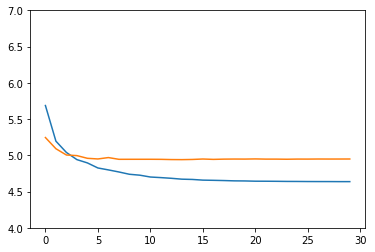

In [100]:
plot_loss(log_path_op,ylim=[4,7],MAX=30)

In [16]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0213_op_14.mdl \
                    --data_dir ../../data/op_sub_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 4933 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: バカやろう
tgt: 残さず全部拾え
1[-3.99]: 心配するな 
2[-4.41]: まってe 
3[-4.67]: まって そう 
4[-4.74]: まってじゃない 
5[-6.61]: 掛せない 

Dial 2:
src: コオロギがいる
tgt: ああ
1[-4.44]: こっち 
2[-4.62]: 年 
3[-5.02]: 年えてなら 
4[-5.22]: 年に行く 
5[-5.52]: 年洩 

Dial 3:
src: 君の胃の中にある
tgt: ベーコン
1[-3.58]: 妙な 
2[-3.92]: つ 
3[-4.56]: いや 
4[-4.63]: つホント 君の 
5[-5.15]: つホント 

Dial 4:
src: よし、去る前に言いたいことはあるか
tgt: 噛めよ
1[-3.88]: うん 
2[-4.12]: す 
3[-4.54]: いや 
4[-5.20]: いや、器 
5[-5.84]: す、 おっと 

Dial 5:
src: 彼のリクエストだ
tgt: 殺せとは言われてないでしょ
1[-4.93]: リーと言っててるきます 
2[-5.18]: リーと言っててる 
3[-5.36]: お前ク 
4[-6.12]: [人名] 
5[-6.22]: リーと言って 

Dial 6:
src: ありがとう
tgt: 見える
1[-3.83]: もう 
2[-3.88]: はい 
3[-3.92]: す 
4[-4.14]: [人名]いしたこうだな 
5[-5.62]: [人名] 

Dial 7:
src: テープを送って才能がないと言われたら
tgt: 君はものにならん
1[-5.70]: 使った気に 
2[-5.73]: [人名] 
3[-6.78]: 使った 
4[-6.88]: お前を 
5[-7.82]: [人名]いいいよ 

Dial 8:
src: ああちくしょう
tgt: 救済の希望を失った[人名]
1[-4.12]: きました見つからない停止 
2[-4.33]: 撮聞くー 
3[-5.

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f67bcb3e860>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [13]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_op_13.mdl \
                    --data_dir ../../data/op_sub_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 4933 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: これでもう安全だ
tgt: テープを頼むぞ貴重な記録だ
1[-4.53]: ああ 
2[-5.21]: ここから出してくれ 
3[-5.75]: これ以上 
4[-5.90]: ああくそ 
5[-5.91]: 約束する 

Dial 2:
src: 彼女はあなたに、依存している
tgt: 先生、
1[-5.17]: 彼女は 
2[-5.71]: あなたは 
3[-5.83]: 私は 
4[-7.41]: あなたは、すべての権利 
5[-7.56]: 彼女は私の息子 

Dial 3:
src: いんちきゾンビめ
tgt: 計画は失敗したんだ
1[-3.92]: だめだ 
2[-3.93]: やめろ 
3[-4.14]: くそ 
4[-4.22]: だめだめ 
5[-6.00]: そいつら 

Dial 4:
src: 何が必要なのか分からなかったら
tgt: 狂ってしまったか
1[-5.35]: お前のせいだ 
2[-5.52]: あいつら 
3[-5.71]: お前 
4[-6.23]: 自分たちのせいだ 
5[-6.44]: 自分たちのせいだと思う 

Dial 5:
src: 分かった、行くが良い
tgt: [数詞]人共、嘘つきで殺人者だ
1[-3.44]: ダメだ 
2[-3.50]: 分かった 
3[-3.71]: 行こう 
4[-4.45]: よし 
5[-5.41]: よし、行こう 

Dial 6:
src: ソーンどこに行く
tgt: エディ
1[-3.67]: 分からない 
2[-4.38]: 知らない 
3[-4.38]: ドリー 
4[-5.05]: ソーン 
5[-5.49]: 仕事 

Dial 7:
src: 彼は妻を誘拐、
tgt: 娘も
1[-4.39]: 妻を殺した 
2[-5.12]: そして 
3[-5.35]: 妻が死んだ 
4[-5.92]: 妻と息子を奪った 
5[-5.94]: 妻と息子を殺した 

Dial 8:
src: いつもだ
tgt: 今までは
1[-4.54]: さあ 
2[-4.74]: よし 


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f10ac6cb0b8>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　OpenSubtitles -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0208_op14_clean

Use emotion: True

Checkpoint path: ./model/0213_op_14.mdl

Pretrained: True

Fix embedding: False

l2_pooling: False

lr_decay: 0.5773502691896258

EOS_id: 2

decay_step: 100

max_epoch: 100

SOS_id: 1

hidden_size: 256

UNK_id: 3

num_layers: 2

inf_last: False

MAX_UTTR_LEN: 50

learning_rate: 3e-05

decoder_learning_ratio: 1.0

max_gradient: 50.0

PAD_id: 0

batch_size: 64

Minimize validation loss(9.6098) : 65 Epoch 
Minimize validation loss(9.6098) : 66 Epoch 
Minimize validation loss(9.6098) : 67 Epoch 
Minimize validation loss(9.6098) : 68 Epoch 
Minimize validation loss(9.6098) : 69 Epoch 
Minimize validation loss(9.6098) : 70 Epoch 
Minimize validation loss(9.6098) : 71 Epoch 
Minimize validation loss(9.6098) : 72 Epoch 
Minimize validation loss(9.6098) : 73 Epoch 
Minimize validation loss(9.6098) : 74 Epoch 
Minimize validation loss(

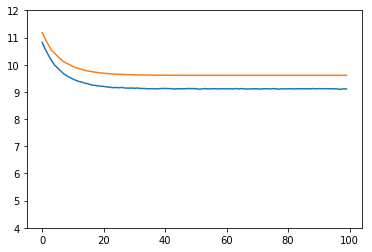

In [106]:
plot_loss(lop_path_op14_clean, ylim=[4,12], MAX=100)

In [109]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op14_clean_65.mdl \
                    --data_dir ../../data/em_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 194 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: ・・・ん。
tgt: おや、やる気になってくれました?
1[-0.74]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、嫌い、、、、、、、、、嫌い、、、、、、、、、、、、、 
2[-0.78]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、嫌い、、、、、、、、、、、、、、、、、、、、、、、 
3[-0.80]: 考え、嫌い嫌い嫌い、嫌い、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
4[-0.81]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
5[-0.86]: 考え、嫌い嫌い嫌い、嫌い、、、嫌い、、、、、、、、、、、、、、、嫌い、、、、、、、、、嫌い、、、、、、、、、、、、嫌い 

Dial 2:
src: 泣くなよ
tgt: 泣き止んだら掃除してくれる
1[-3.34]: 幽霊警官ほしい 
2[-3.49]: 泣く 
3[-3.55]: 幽霊 
4[-4.17]: 幽霊警官ほしいロボット 
5[-4.25]: 泣く幽霊 

Dial 3:
src: わかったよ。掃除すればいいんでしょ。
tgt: うん、綺麗な部屋は気持ちがいいよ。
1[-4.15]: 掃除掃除汚い観。 
2[-4.28]: 掃除掃除汚い今。 
3[-4.41]: 掃除掃除汚い観。。 
4[-4.43]: 掃除掃除汚い今。。 
5[-6.96]: 掃除掃除汚い観 

Dial 4:
src: うるさいなぁ。
tgt: なんでこんなに言ってるのに掃除してくれないの。シクシク。
1[-0.83]: 忘れ、、、、、、、、、空、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
2[-0.83]: 忘れ、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、 
3[-0.85]: 忘れ、、、、、、、、、空、、空、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、、

# ☆　OpenSubtitles -> all

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0220_op14_all

Use emotion: True

Checkpoint path: ./model/0213_op_14.mdl

Pretrained: True

Fix embedding: False

EOS_id: 2

lr_decay: 0.5773502691896258

hidden_size: 256

decoder_learning_ratio: 1.0

num_layers: 2

tfd_lambda: 0.4

dropout: 0.1

MAX_UTTR_LEN: 50

batch_size: 64

PAD_id: 0

decay_step: 360

inf_last: False

learning_rate: 3e-05

max_epoch: 400

l2_pooling: False

max_gradient: 50.0

Minimize validation loss(7.4166) : 49 Epoch 
Minimize validation loss(7.4166) : 50 Epoch 
Minimize validation loss(7.4166) : 51 Epoch 
Minimize validation loss(7.4166) : 52 Epoch 
Minimize validation loss(7.4166) : 53 Epoch 
Minimize validation loss(7.4166) : 54 Epoch 
Minimize validation loss(7.4166) : 55 Epoch 
Minimize validation loss(7.4166) : 56 Epoch 
Minimize validation loss(7.4166) : 57 Epoch 
Minimize validation loss(7.4166) : 58 Epoch 
Minimize validation los

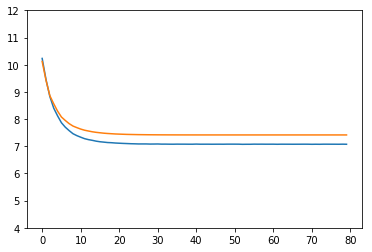

In [114]:
plot_loss(lop_path_op14_all, ylim=[4,12], MAX=80)

In [115]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0220_op14_all_49.mdl \
                    --data_dir ../../data/em_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 194 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あとで
tgt: いつもあとでって言うけどしないじゃない
1[-3.73]: Aさん? 
2[-4.01]: Aさんよさんよさん? 
3[-4.65]: はい 
4[-5.44]: 自分で 
5[-5.66]: Aさんよ 

Dial 2:
src: 部屋を片付けないだけで病院とか大げさでしょ
tgt: 私には報告する義務がありますので仕方ありません
1[-0.56]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
2[-0.65]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
3[-0.85]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
4[-0.96]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 
5[-1.10]: Aさんさんさんさんさんさんさんさんさんさんさんさんさんさんさん? 

Dial 3:
src: 避けて歩くから大丈夫だって。
tgt: お菓子の袋にゴキブリも寄ってきますよ。
1[-2.96]: Aさん? 
2[-3.73]: Aさん?。 
3[-3.98]: 。 
4[-4.10]: Aさん! 
5[-4.81]: はい。 

Dial 4:
src: 行きたくない!
tgt: じゃあ頑張ってきれいにしようよ!
1[-2.92]: Aさん? 
2[-4.12]: Aさんさん? 
3[-4.28]: Aさん! 
4[-4.81]: 僕 
5[-5.00]: Aさん 

Dial 5:
src: まだ部屋はそんなに汚くないから次回にしよう
tgt: 昨日もそんなことを言いました。充分汚れています。
1[-4.61]: はい 
2[-5.27]: 生活停止! 
3[-5.34]: 生活停止!!! 
4[-5.80]: 生活停止!! 
5[-6.06]: お! 

Dial 6:
src: 部屋を綺麗にしてもやる気にならないよ。
tgt: この

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8fd0d12048>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

### It must be not able to fine-tuning by the model using OpenSubtitles